In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
from adjustText import adjust_text

anot = pd.read_csv('aneuploidy_data_NEW.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

# from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')







No handles with labels found to put in legend.


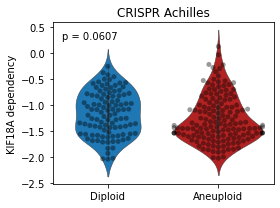

In [5]:
##########################################################################################
######################################### figex 9f #######################################
##########################################################################################

from scipy import stats

fix,ax = plt.subplots(figsize=(4,3))

shared = set(anot.index) & set(gene_effect_crispr_achilles.index)
temp = gene_effect_crispr_achilles.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'



#fig,ax = plt.subplots()
sns.violinplot(y = 'KIF18A (81930)',x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal,ax=ax)
sns.swarmplot(y = 'KIF18A (81930)',x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel('KIF18A dependency')
# plotting.simpleaxis()



tt,p_val = stats.ttest_ind(temp.loc[trus,'KIF18A (81930)'].dropna(),temp.loc[falsee,'KIF18A (81930)'].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)
plt.title('CRISPR Achilles')
plt.tight_layout()
# plt.savefig('fig7d/KIF18A_crispr_achilles.pdf')
# plt.savefig('fig3c/prism.pdf')

No handles with labels found to put in legend.


RNAi drive p-value for KIF18A: 2.5201353007111625e-06


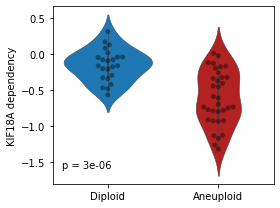

In [12]:
##########################################################################################
######################################### figex 9g #######################################
##########################################################################################

fig,axx = plt.subplots(1,1,figsize=(4,3))

from scipy import stats
anot = tc.get(name='aneuploidy-data-d0b9', version=19, file='using_ten_percent_NEW')

genes = ['BUB1B (701)','MAD2L1 (4085)','KIF18A (81930)']
gene_effect_rnai_drive_ = gene_effect_rnai_drive.loc[:,genes]

shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive_.index)
temp = gene_effect_rnai_drive_.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
# sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
# sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
# axx[0].set_title('RNAi drive')
# axx[0].set_ylabel('BUB1B dependency')
# axx[0].set_xlabel('')

# # plotting.simpleaxis(axx[0])


# # plt.figure()
# sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
# sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
# #axx[1].set_title('RNAi drive')
# axx[1].set_ylabel('MAD2L1 dependency')
# axx[1].set_xlabel('')

# plotting.simpleaxis(axx[1])



sns.violinplot(y = 'KIF18A (81930)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx,order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'KIF18A (81930)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx,order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx.set_ylabel('KIF18A dependency')
axx.set_xlabel('')

# plotting.simpleaxis(axx)



plt.tight_layout()


# tt,p_val = stats.ttest_ind(gene_effect_rnai_drive_.loc[trus,'BUB1B (701)'],gene_effect_rnai_drive_.loc[falsee,'BUB1B (701)'])
# print('RNAi drive p-value for BUB1B: ' + str(p_val))
# axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
# tt,p_val = stats.ttest_ind(gene_effect_rnai_drive_.loc[trus,'MAD2L1 (4085)'].dropna(),gene_effect_rnai_drive_.loc[falsee,'MAD2L1 (4085)'].dropna())
# print('RNAi drive p-value for MAD2L1: ' + str(p_val))
# axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_rnai_drive_.loc[trus,'KIF18A (81930)'].dropna(),gene_effect_rnai_drive_.loc[falsee,'KIF18A (81930)'].dropna())
print('RNAi drive p-value for KIF18A: ' + str(p_val))
axx.legend(title='p = '+ str(round(p_val,6)),frameon=False,loc='lower left')




# plt.savefig('review_plots/rnai_drive_10_percent_NEW.pdf')



No handles with labels found to put in legend.


p-value for BUB1B: 0.17351640007510927


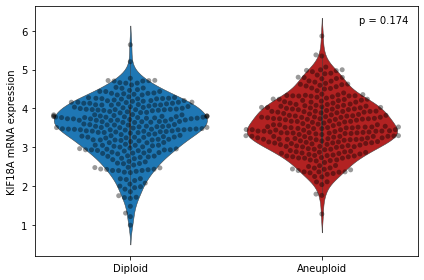

In [20]:
##########################################################################################
######################################### figex 9h #######################################
##########################################################################################


anot = pd.read_csv('aneuploidy_data_NEW.csv',index_col=0)

sample_info = tc.get(name='internal-19q4-fb11', version=29, file='sample_info')
sample_info.index = sample_info.loc[:,'CCLE_Name'] 
sample_info = sample_info[~sample_info.index.duplicated(keep='first')]
sample_info_ = sample_info.copy()
sample_info_.index = sample_info_.loc[:,'DepMap_ID']

# get mrna data
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')
public_19Q4_proteincoding_tpm_ccle =  public_19Q4_proteincoding_tpm.copy()
public_19Q4_proteincoding_tpm_ccle.index = sample_info_.loc[public_19Q4_proteincoding_tpm.index,'CCLE_Name']
public_19Q4_proteincoding_tpm_ccle.columns = public_19Q4_proteincoding_tpm_ccle.columns.str.split(' ').str[0]

public_19Q4_proteincoding_tpm.columns = public_19Q4_proteincoding_tpm.columns.str.split(' ').str[0]

shared = set(anot.index) & set(public_19Q4_proteincoding_tpm.index)
temp = public_19Q4_proteincoding_tpm.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

sns.violinplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),color='black',alpha=.4,order=my_order)


from scipy import stats
tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'KIF18A'].dropna(),public_19Q4_proteincoding_tpm.loc[falsee,'KIF18A'].dropna())
print('p-value for BUB1B: ' + str(p_val))
plt.legend(title='p = '+ str(round(p_val,3)),frameon=False)
# plotting.simpleaxis()
plt.ylabel('KIF18A mRNA expression')
plt.xlabel('')
plt.tight_layout()

No handles with labels found to put in legend.


p-value for BUB1B: 0.1192728478473893


<Figure size 432x288 with 0 Axes>

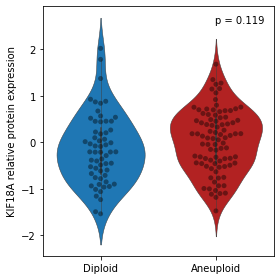

<Figure size 432x288 with 0 Axes>

In [23]:
##########################################################################################
######################################### figex 9i #######################################
##########################################################################################

fig,axx = plt.subplots(figsize=(4,4))


# get protein data
protein_quant_current_normalized = tc.get(name='total-proteome--5c50', version=1, file='protein_quant_current_normalized')
protein_quant_current_normalized.index = protein_quant_current_normalized.loc[:,'Gene_Symbol']
protein_quant_current_normalized.columns = protein_quant_current_normalized.columns.str.split('_Ten').str[0]
protein_quant_current_normalized = protein_quant_current_normalized.loc[:,'MDAMB468_BREAST':].T
protein_quant_current_normalized = protein_quant_current_normalized[~protein_quant_current_normalized.index.duplicated(keep=False)]




shared = set(anot_CCLE.index) & set(protein_quant_current_normalized.index)
temp = protein_quant_current_normalized.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


sns.violinplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),color='black',alpha=.4,order=my_order)


from scipy import stats
tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'KIF18A'].dropna(),protein_quant_current_normalized.loc[falsee,'KIF18A'].dropna())
print('p-value for BUB1B: ' + str(p_val))
plt.legend(title='p = '+ str(round(p_val,3)),frameon=False)
# plotting.simpleaxis()
plt.ylabel('KIF18A relative protein expression')
plt.xlabel('')
plt.tight_layout()

plt.figure()

No handles with labels found to put in legend.


Text(0.5, 1.0, '(spearman)')

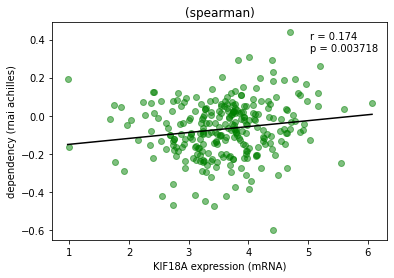

In [32]:
##########################################################################################
######################################### figex 9j #######################################
##########################################################################################
import scipy
from scipy import stats


gene_effect_rnai_achilles.columns = gene_effect_rnai_achilles.columns.str.split(' ').str[0]
shared = set(public_19Q4_proteincoding_tpm_ccle.loc[:,'KIF18A'].dropna().index) & set(gene_effect_rnai_achilles.loc[:,'KIF18A'].dropna().index)


fig,ax= plt.subplots()
plt.scatter(public_19Q4_proteincoding_tpm_ccle.loc[shared,'KIF18A'],gene_effect_rnai_achilles.loc[shared,'KIF18A'],label=None,alpha=.5,color='green')

plt.ylabel('dependency (rnai achilles)')
plt.xlabel('KIF18A expression (mRNA)')

# plotting.simpleaxis()


plt.plot(np.unique(public_19Q4_proteincoding_tpm_ccle.loc[shared,'KIF18A']), np.poly1d(np.polyfit(public_19Q4_proteincoding_tpm_ccle.loc[shared,'KIF18A'], gene_effect_rnai_achilles.loc[shared,'KIF18A'], 1))(np.unique(public_19Q4_proteincoding_tpm_ccle.loc[shared,'KIF18A'])),color='black')

r,p = scipy.stats.spearmanr(public_19Q4_proteincoding_tpm_ccle.loc[shared,'KIF18A'],gene_effect_rnai_achilles.loc[shared,'KIF18A'])
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
plt.title('(spearman)')



No handles with labels found to put in legend.


Text(0.5, 1.0, '(spearman)')

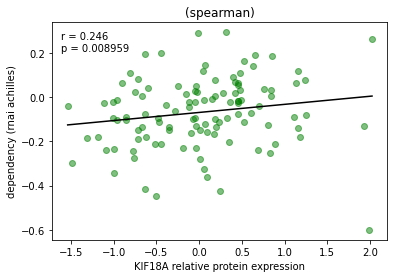

In [33]:
##########################################################################################
######################################### figex 9k #######################################
##########################################################################################

shared = set(protein_quant_current_normalized.loc[:,'KIF18A'].dropna().index) & set(gene_effect_rnai_achilles.loc[:,'KIF18A'].dropna().index)


fig,ax= plt.subplots()
plt.scatter(protein_quant_current_normalized.loc[shared,'KIF18A'],gene_effect_rnai_achilles.loc[shared,'KIF18A'],label=None,color='green',alpha=.5)

plt.ylabel('dependency (rnai achilles)')
plt.xlabel('KIF18A relative protein expression')

# plotting.simpleaxis()


plt.plot(np.unique(protein_quant_current_normalized.loc[shared,'KIF18A']), np.poly1d(np.polyfit(protein_quant_current_normalized.loc[shared,'KIF18A'], gene_effect_rnai_achilles.loc[shared,'KIF18A'], 1))(np.unique(protein_quant_current_normalized.loc[shared,'KIF18A'])),color='black')

r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[shared,'KIF18A'],protein_quant_current_normalized.loc[shared,'KIF18A'])
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
plt.title('(spearman)')

